<span style="display: block; text-align: right;">*Ricardo L. Blank*</span>

# Análise dos preços dos combustíveis no Brasil

O objetivo deste notebook é fazer uma análise dos dados da série histórica do 2º semestre de 2022 obtidos através da [ANP](https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/serie-historica-de-precos-de-combustiveis) (Agência Naciona do Petróleo, Gás Natural e Biocombustíveis), com o intuito de observar a distribuição do preço dos combustíveis pelo Brasil.

Atualmente a agência disponibiliza um dashboard com dados históricos da variação dos preços para consulta pública (veja neste [link](https://app.powerbi.com/view?r=eyJrIjoiMGM0NDhhMTUtMjQwZi00N2RlLTk1M2UtYjkxZTlkNzM1YzE5IiwidCI6IjQ0OTlmNGZmLTI0YTYtNGI0Mi1iN2VmLTEyNGFmY2FkYzkxMyJ9))

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')

## Carregamento e tratamento dos dados

In [63]:
df = pd.read_csv('ca-2022-02.csv', sep=';')
df.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,NaN,LACE,29703-030,GASOLINA ADITIVADA,01/07/2022,"7,48",NaN,R$ / litro,VIBRA ENERGIA
1,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,NaN,LACE,29703-030,GASOLINA,01/07/2022,"7,38",NaN,R$ / litro,VIBRA ENERGIA
2,SE,ES,COLATINA,POSTO MOTOCAP LTDA,04.814.652/0001-10,PRACA ALMIRANTE BARROSO,52,LETRA A,LACE,29703-055,DIESEL S10,01/07/2022,"7,69",NaN,R$ / litro,VIBRA ENERGIA
3,SE,ES,COLATINA,POSTO MOTOCAP LTDA,04.814.652/0001-10,PRACA ALMIRANTE BARROSO,52,LETRA A,LACE,29703-055,ETANOL,01/07/2022,"5,99",NaN,R$ / litro,VIBRA ENERGIA
4,SE,ES,COLATINA,POSTO MOTOCAP LTDA,04.814.652/0001-10,PRACA ALMIRANTE BARROSO,52,LETRA A,LACE,29703-055,GASOLINA,01/07/2022,"7,39",NaN,R$ / litro,VIBRA ENERGIA


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378078 entries, 0 to 378077
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Regiao - Sigla     378078 non-null  object 
 1   Estado - Sigla     378078 non-null  object 
 2   Municipio          378078 non-null  object 
 3   Revenda            378078 non-null  object 
 4   CNPJ da Revenda    378078 non-null  object 
 5   Nome da Rua        378078 non-null  object 
 6   Numero Rua         377902 non-null  object 
 7   Complemento        81264 non-null   object 
 8   Bairro             377177 non-null  object 
 9   Cep                378078 non-null  object 
 10  Produto            378078 non-null  object 
 11  Data da Coleta     378078 non-null  object 
 12  Valor de Venda     378078 non-null  object 
 13  Valor de Compra    0 non-null       float64
 14  Unidade de Medida  378078 non-null  object 
 15  Bandeira           378078 non-null  object 
dtypes:

In [65]:
# Valor de compra é uma coluna vazia
df = df.drop('Valor de Compra', axis=1)

# Transforma o preço em tipo numérico float
df['Valor de Venda'] = df['Valor de Venda'].apply(lambda x: float(x.replace(',', '.')))

# Renomeia algumas colunas por conveniência
df = df.rename(columns={'Regiao - Sigla': 'Regiao', 'Estado - Sigla': 'Estado'})

In [66]:
df.head()

,Regiao,Estado,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
0,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,NaN,LACE,29703-030,GASOLINA ADITIVADA,01/07/2022,7.48,R$ / litro,VIBRA ENERGIA
1,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,NaN,LACE,29703-030,GASOLINA,01/07/2022,7.38,R$ / litro,VIBRA ENERGIA
2,SE,ES,COLATINA,POSTO MOTOCAP LTDA,04.814.652/0001-10,PRACA ALMIRANTE BARROSO,52,LETRA A,LACE,29703-055,DIESEL S10,01/07/2022,7.69,R$ / litro,VIBRA ENERGIA
3,SE,ES,COLATINA,POSTO MOTOCAP LTDA,04.814.652/0001-10,PRACA ALMIRANTE BARROSO,52,LETRA A,LACE,29703-055,ETANOL,01/07/2022,5.99,R$ / litro,VIBRA ENERGIA
4,SE,ES,COLATINA,POSTO MOTOCAP LTDA,04.814.652/0001-10,PRACA ALMIRANTE BARROSO,52,LETRA A,LACE,29703-055,GASOLINA,01/07/2022,7.39,R$ / litro,VIBRA ENERGIA


### Preço mínimo e máximo

In [67]:
df.iloc[df['Valor de Venda'].idxmin(),:]

Regiao                                            SE
Estado                                            SP
Municipio                                 ARARAQUARA
Revenda                AUTO POSTO DALLAS CENTER LTDA
CNPJ da Revenda                   02.008.954/0001-76
Nome da Rua          AVENIDA MARIA A. C. DE OLIVEIRA
Numero Rua                                      1869
Complemento                                      NaN
Bairro                                        CENTRO
Cep                                        14801-260
Produto                                       ETANOL
Data da Coleta                            10/10/2022
Valor de Venda                                  2.49
Unidade de Medida                         R$ / litro
Bandeira                                      ALESAT
Name: 245461, dtype: object

In [68]:
df.iloc[df['Valor de Venda'].idxmax(),:]

Regiao                                                SE
Estado                                                SP
Municipio                                      SAO PAULO
Revenda              AUTO POSTO JARDIM BRITANIA LIMITADA
CNPJ da Revenda                       02.534.735/0001-20
Nome da Rua                  RUA LEOPOLDO DE PASSOS LIMA
Numero Rua                                            43
Complemento                                          NaN
Bairro                                   JARDIM SANTA FE
Cep                                            05271-000
Produto                                       DIESEL S10
Data da Coleta                                27/12/2022
Valor de Venda                                      9.65
Unidade de Medida                             R$ / litro
Bandeira                                        IPIRANGA
Name: 371039, dtype: object

## Distribuição dos preços médios da gasolina

Aqui o objetivo é olhar num primeiro momento somente para a gasolina e desenvolver alguns visuais que ofereçam alguns insights a respeito da distribuição dos preços.

In [69]:
preco_gasolina_regiao = df.query("Produto == 'GASOLINA'").groupby('Regiao')['Valor de Venda'].mean()
preco_gasolina_regiao

Regiao
CO    5.284771
N     5.520230
NE    5.575358
S     5.302480
SE    5.259455
Name: Valor de Venda, dtype: float64

In [70]:
preco_gasolina_regiao = preco_gasolina_regiao.rename(index={'CO':'Centro-oeste',
                                                            'N':'Norte',
                                                            'NE':'Nordeste',
                                                            'S':'Sul',
                                                            'SE':'Sudeste'}).sort_values()

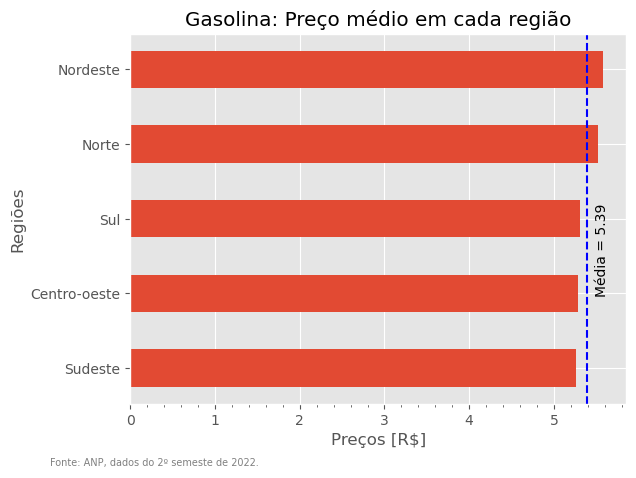

In [71]:
fig, ax = plt.subplots()

# gráfico de barras horizontais
ax.barh(preco_gasolina_regiao.index, preco_gasolina_regiao, height=0.5)
ax.set_title("Gasolina: Preço médio em cada região")
ax.set_xlabel("Preços [R$]")
ax.set_ylabel("Regiões")

# ajustes dos ticks
ax.minorticks_on()
ax.yaxis.set_tick_params(which='minor', left=False)

# preço médio no Brasil
ax.axvline(x=preco_gasolina_regiao.mean(), linestyle='--', color='b')
ax.text(x=preco_gasolina_regiao.mean() + 0.1,
        y=1,
        s='Média = {}'.format(round(preco_gasolina_regiao.mean(), 2)),
        rotation='vertical')

# nota de rodapé
plt.figtext(0, -0.02, "Fonte: ANP, dados do 2º semeste de 2022.", fontsize=7, color='gray');

#plt.savefig('gasolina_por_regiao.png', bbox_inches='tight')

In [72]:
preco_gasolina_estado = df.query("Produto == 'GASOLINA'").groupby('Estado')['Valor de Venda'].mean().sort_values()
preco_gasolina_estado

Estado
AP    4.845026
SP    5.185755
RS    5.212248
MS    5.223993
DF    5.244217
GO    5.254339
SE    5.256719
PB    5.262997
MG    5.318034
SC    5.347911
ES    5.355702
PR    5.371444
MT    5.388618
MA    5.442682
RJ    5.448621
RO    5.490617
PA    5.493485
RR    5.524235
AL    5.536216
CE    5.541973
PE    5.544280
PI    5.574537
TO    5.610637
AM    5.618120
RN    5.653300
BA    5.817738
AC    5.949311
Name: Valor de Venda, dtype: float64

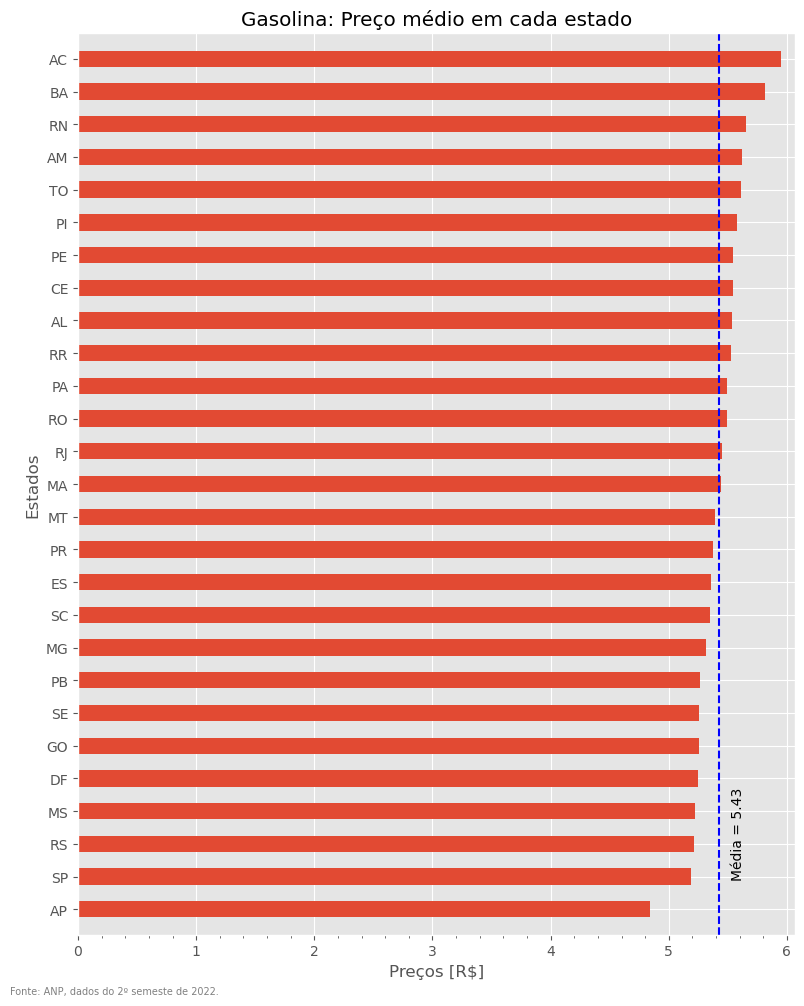

In [73]:
fig, ax = plt.subplots(figsize=(8,10))

# gráfico de barras horizontais
ax.barh(preco_gasolina_estado.index, preco_gasolina_estado, height=0.5)
ax.set_title("Gasolina: Preço médio em cada estado")
ax.set_xlabel("Preços [R$]")
ax.set_ylabel("Estados")

# ajustes dos ticks
ax.minorticks_on()
ax.yaxis.set_tick_params(which='minor', left=False)

# preço médio no Brasil
ax.axvline(x=preco_gasolina_estado.mean(), linestyle='--', color='b')
ax.text(x=preco_gasolina_estado.mean() + 0.1,
        y=1,
        s='Média = {}'.format(round(preco_gasolina_estado.mean(), 2)),
        rotation='vertical')

# nota de rodapé
plt.figtext(0, 0, "Fonte: ANP, dados do 2º semeste de 2022.", fontsize=7, color='gray');

# ajuste da margem
ax.margins(0.02)

plt.tight_layout()

#plt.savefig('gasolina_por_estado.png', bbox_inches='tight')

### Demais produtos

Nesta parte eu replico os visuais desenvolvidos anteriormente para os outros produtos, a fim de se observar as discrepâncias entre os preços dos diversos tipos de combustíveis.

In [74]:
df['Produto'].value_counts(normalize=True)

GASOLINA              0.254770
ETANOL                0.223573
DIESEL S10            0.197478
GASOLINA ADITIVADA    0.193262
DIESEL                0.110459
GNV                   0.020459
Name: Produto, dtype: float64

Os dados para Diesel e GNV principalmente são mais escassos quando comparado aos outros. É, portanto, importante considerar este fator em análises posteriores.

In [75]:
produtos = np.sort(df['Produto'].unique())
produtos

array(['DIESEL', 'DIESEL S10', 'ETANOL', 'GASOLINA', 'GASOLINA ADITIVADA',
       'GNV'], dtype=object)

In [76]:
def plotagem(produto, ax, ylabel):
    """ Uma helper function para plotar os gráficos de cada produto"""
    
    # grafíco de barras horizontais
    ax.barh(produto.index, width=produto, height=0.5)
    ax.set_title(produto.name)
    ax.set_xlabel('Preço [R$]')
    ax.set_ylabel(ylabel)
    
    # indicação do preço médio no Brasil
    ax.axvline(x=produto.mean(), linestyle='--', color='b')
    ax.text(x=produto.mean()+0.1, y=0.5, s='Média = {}'.format(round(produto.mean(), 2)), rotation='vertical')
    
    # ajustes dos ticks
    ax.set_xticks(np.arange(0, produto.max() + 1, 0.5))
    ax.minorticks_on()
    ax.tick_params(axis='y', which='minor', left=False)
    
    ax.margins(0.02)
    
    return ax

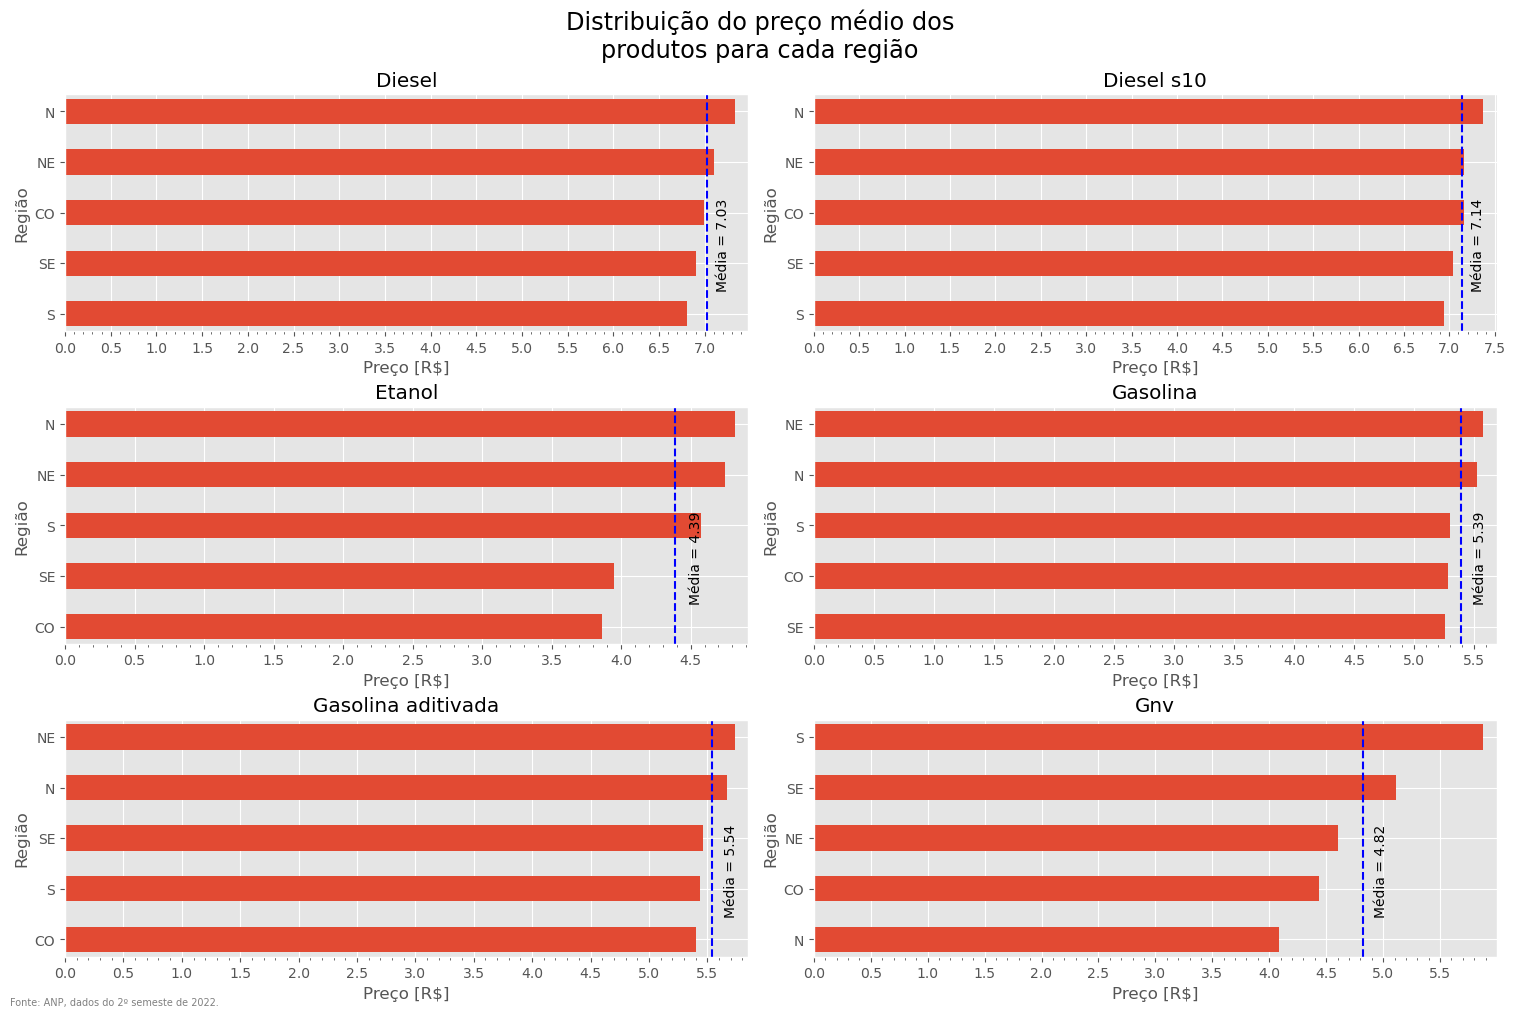

In [77]:
fig, axs = plt.subplots(nrows=round(len(produtos) / 2), ncols=2, figsize=(15,10), constrained_layout=True)
fig.suptitle("Distribuição do preço médio dos\nprodutos para cada região", fontsize='xx-large')

for i, produto in enumerate(produtos):
  regiao_df = df[df['Produto'] == produto].groupby('Regiao')['Valor de Venda'].mean().sort_values()
  regiao_df.name = produto.capitalize()

  plotagem(regiao_df, axs.flat[i], 'Região')

# nota de rodapé
plt.figtext(0, 0, "Fonte: ANP, dados do 2º semeste de 2022.", fontsize=7, color='gray');

#plt.savefig('todos_por_regiao.png', bbox_inches='tight')

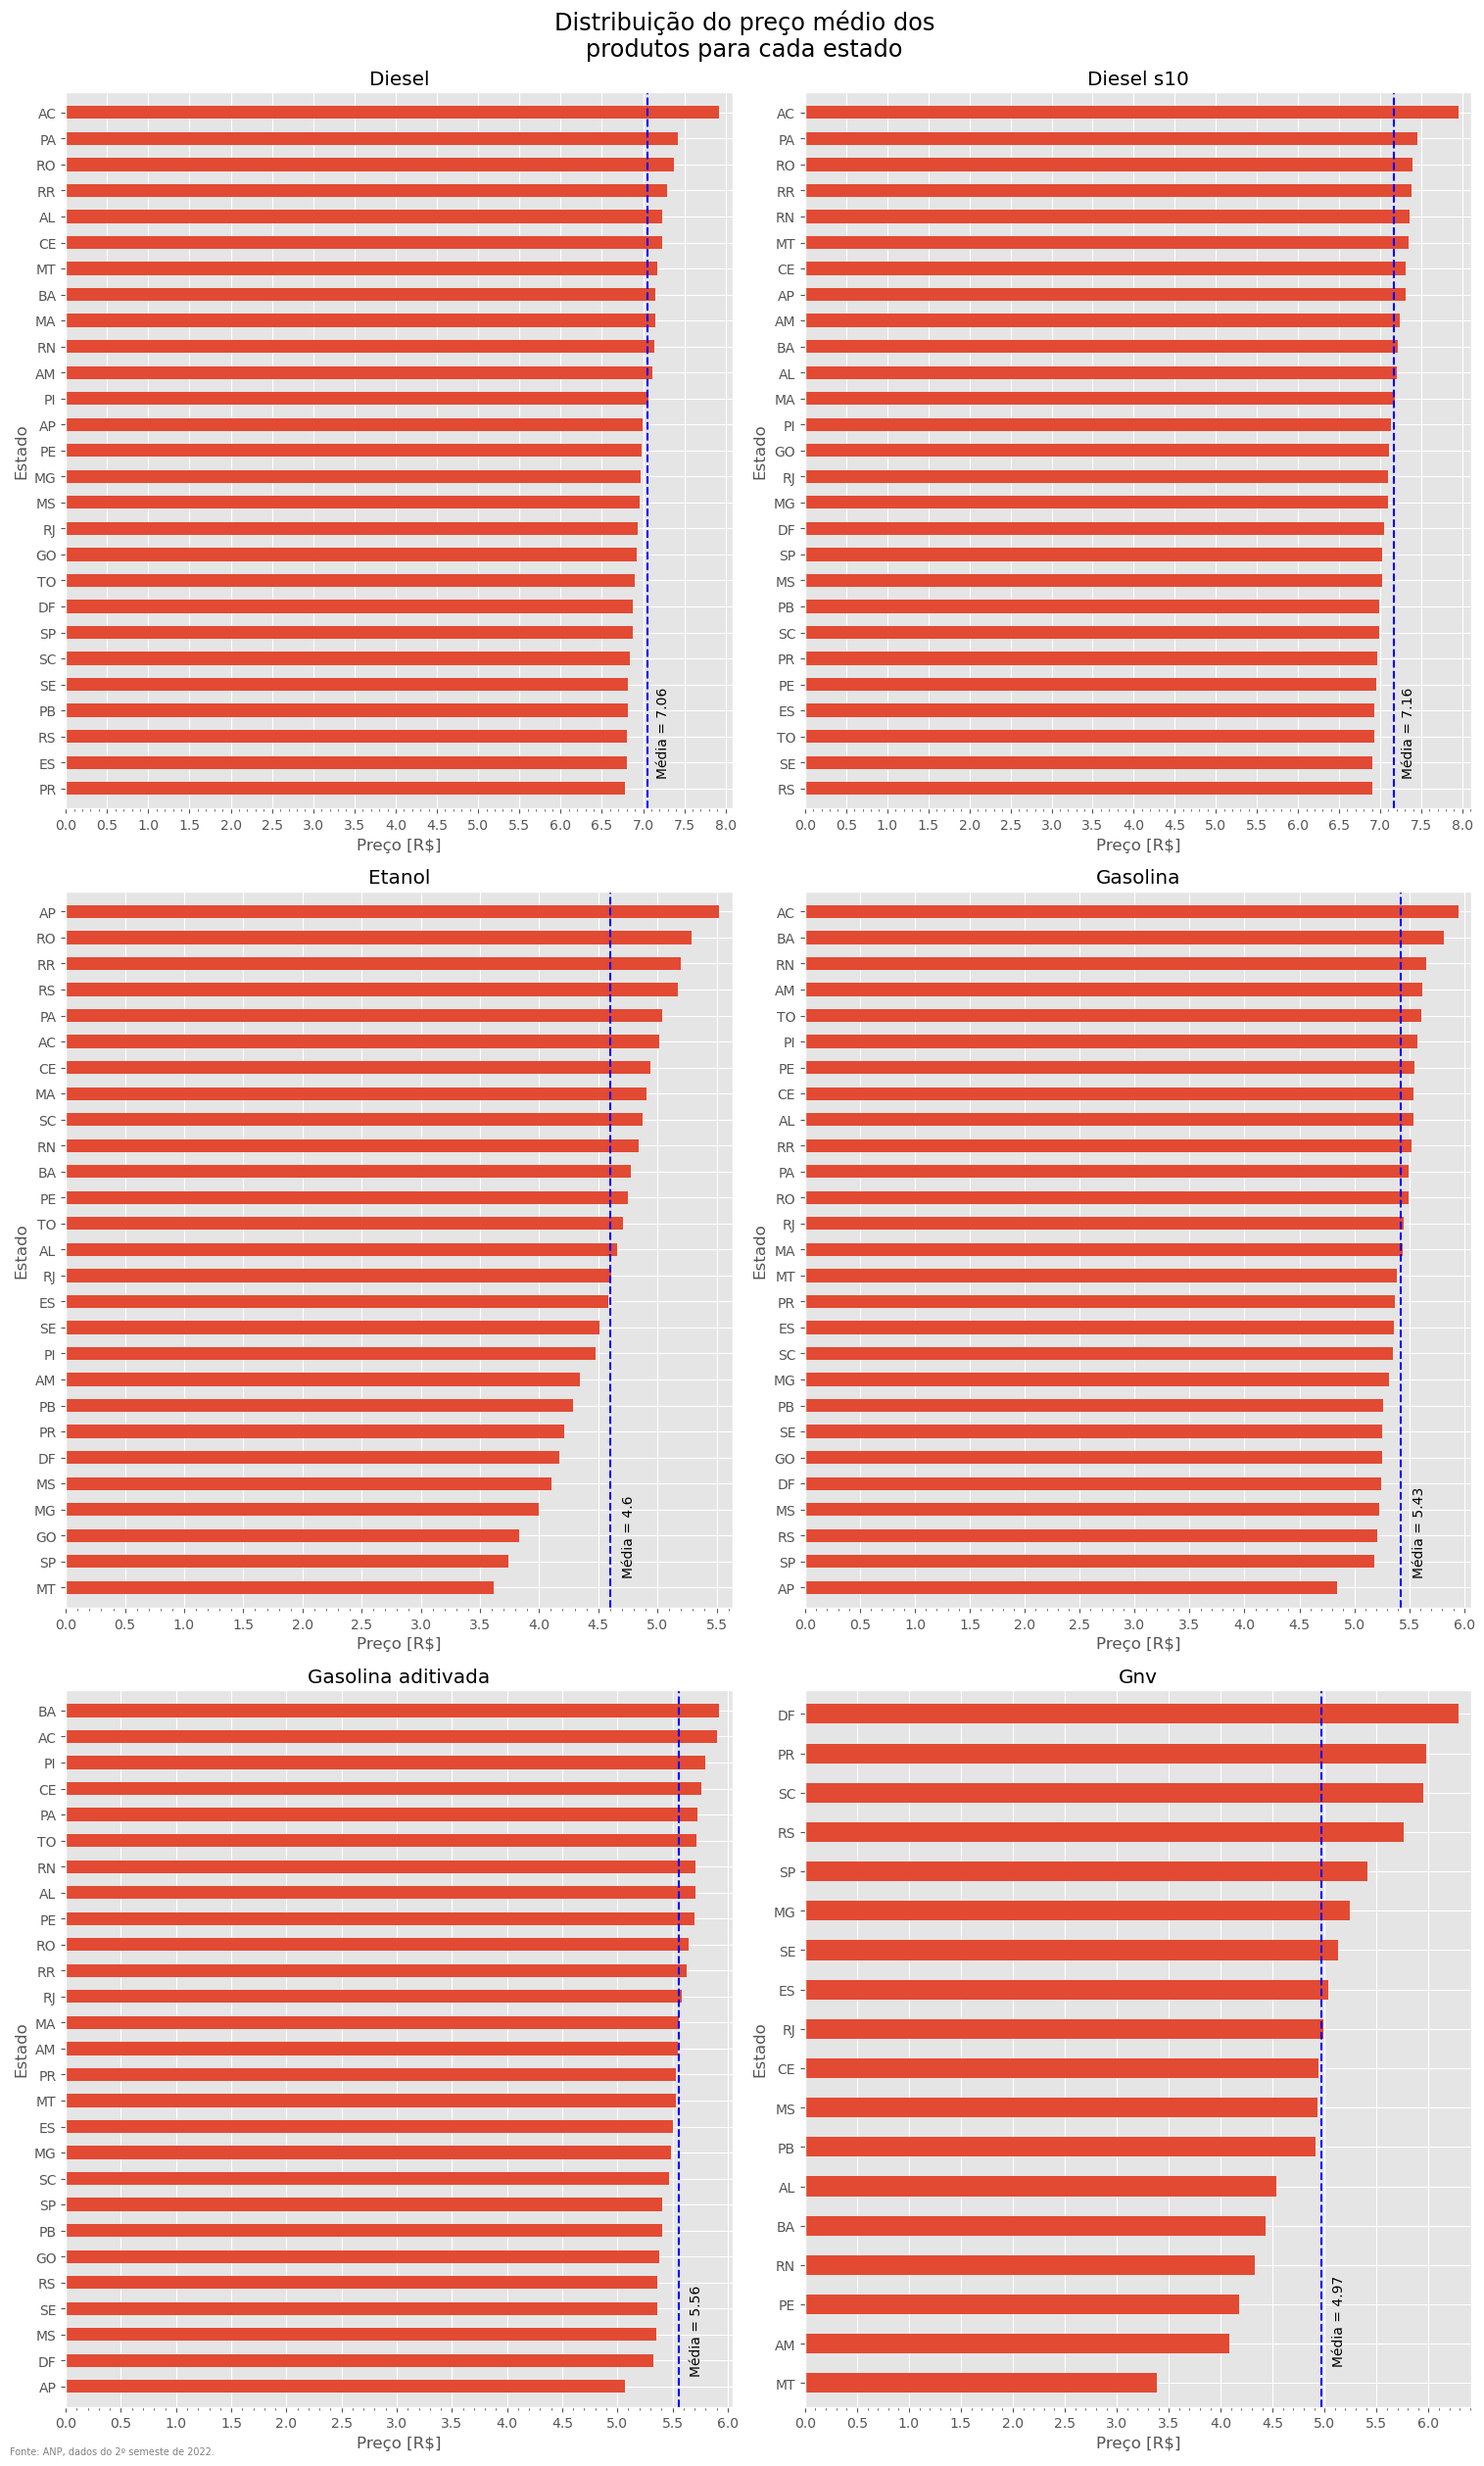

In [78]:
fig, axs = plt.subplots(nrows=round(len(produtos) / 2), ncols=2, figsize=(15,25), constrained_layout=True)
fig.suptitle("Distribuição do preço médio dos\nprodutos para cada estado", fontsize='xx-large')

for i, produto in enumerate(produtos):
  estado_df = df[df['Produto'] == produto].groupby('Estado')['Valor de Venda'].mean().sort_values()
  estado_df.name = produto.capitalize()

  plotagem(estado_df, axs.flat[i], 'Estado')

# nota de rodapé
plt.figtext(0, 0, "Fonte: ANP, dados do 2º semeste de 2022.", fontsize=7, color='gray');

#plt.savefig('todos_por_estado.png', bbox_inches='tight')

Através do gráfico da distribuição de preço por estado é nítido que para GNV não há dados para todos os estados.

In [79]:
df.groupby('Produto')['Estado'].nunique()

Produto
DIESEL                27
DIESEL S10            27
ETANOL                27
GASOLINA              27
GASOLINA ADITIVADA    27
GNV                   18
Name: Estado, dtype: int64

### Estados sem dados para GNV

In [80]:
estados = df.query("Produto == 'GASOLINA'")['Estado'].unique()
estados_gnv = df.query("Produto == 'GNV'")['Estado'].unique()

# Aqui utilizo uma função muito interessante (e creio que pouco conhecida) para encontrar elementos não 
# compartilhados de duas numpy arrays
estados_sem_dados_gnv = np.setxor1d(estados, estados_gnv)
estados_sem_dados_gnv

array(['AC', 'AP', 'GO', 'MA', 'PA', 'PI', 'RO', 'RR', 'TO'], dtype=object)

## Posto de combustível com o menor preço

Nesta parte o objetivo é determinar qual o posto de combustível que conta com o menor preço de acordo com uma cidade escolhida. Posteriormente os dados obtidos através desta query são plotados em um mapa interativo criado a partir das bibliotecas [**geopy**](https://geopy.readthedocs.io/en/stable/) (para obter as coordenadas) e [**folium**](https://python-visualization.github.io/folium/) (para efetivamente plotar o mapa).

In [81]:
def menor_preco(cidade, combustivel):
    """ Função que retorna os dados do posto com o menor preço de acordo com a cidade escolhida"""
    dados = df.iloc[df[(df['Municipio'] == cidade.upper()) & 
                        (df['Produto'] == combustivel.upper())]['Valor de Venda'].idxmin(), :]
    return dados

In [82]:
dados = menor_preco('florianopolis', 'gasolina')

# Junta os dados de endereço em uma string única
endereco_completo = f"{dados['Nome da Rua']}, {dados['Numero Rua']}, {dados['Bairro']}, {dados['Municipio']}, {dados['Estado']}, {dados['Cep']}"
endereco_completo

'RODOVIA FRANCISCO MAGNO VIEIRA, 375, COSTEIRA DO PIRAJUBAE, FLORIANOPOLIS, SC, 88048-000'

In [83]:
from geopy.geocoders import Nominatim
import folium

# É utilizado o Nominatim (OpenStreetMap) como backend por ser open_source
geolocator = Nominatim(user_agent="preco_combustivel")

# Obter as coordenadas a partir do endereço
location = geolocator.geocode(endereco_completo)
coords = location.point[0:2]
location

Location(Rodovia Francisco Magno Vieira, Costeira do Pirajubaé, Florianópolis, Região Geográfica Imediata de Florianópolis, Região Geográfica Intermediária de Florianópolis, Santa Catarina, Região Sul, 88048-000, Brasil, (-27.6486687, -48.5200411, 0.0))

In [84]:
# Dados para popup no mapa
revenda = f"<strong>Revenda:</strong> {dados['Revenda']}"
bandeira = f"<strong>Bandeira:</strong> {dados['Bandeira']}"
preco = f"<strong>Preço/Litro:</strong> R$ {str(dados['Valor de Venda']).replace('.', ',')}"
data_atualizacao = f"<strong>Data da última atualização:</strong> {dados['Data da Coleta']}"
endereco = f"<strong>Endereço:</strong> {endereco_completo}"

In [85]:
# Plotar o mapa com o marker no endereço obtido
m = folium.Map(location=coords, zoom_start=18)

# Popup com dados do posto
popup_text = f"{revenda}<br>{bandeira}<br>{preco}<br>{data_atualizacao}<br>{endereco}"

folium.Marker(
    location=coords,
    popup=folium.map.Popup(popup_text, max_width=300),
    icon=folium.Icon(icon="gas-pump", prefix='fa'),
    ).add_to(m)

m

## Conclusão

Apesar de serem dados relativamente antigos, o principal objetivo deste notebook foi desenvolver uma análise da distribuição dos preços dos combustíveis pelo Brasil, e os resultados mostraram um grau substancial de variabilidade dos preços de acordo com cada tipo de combustível e para cada estado.
Por fim, foi desenvolvida uma ferramenta para a busca do posto de combustível que oferece o menor preço de acordo com os dados. O resultado é demonstrado em um gráfico interativo que conta com todas as informações relevantes. 